Uwaga do lekcji dot. Tensorboard Dev - z dniem 1 stycznia 2024 r. usługa ta została wyłączona.

# Import bibliotek, ładowanie i eksploracja danych.

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

sns.set()

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # ponownie używamy zbioru MNIST

In [3]:
train_images.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

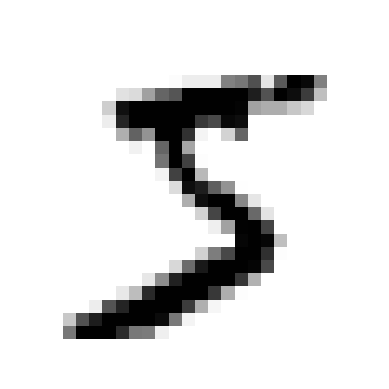

In [4]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [5]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
# tym razem zmienimy rozmiar danych wejściowych - dzięki temu nie musimy użyć warstwy Flatten

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

# Budowa modelu.

In [7]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(784,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

# Zapis i ładowanie modelu.

In [8]:
model.fit(train_images, train_labels, epochs=5) # trenujemy model
model.save('my_model.keras') # zapisujemy wytrenowany model

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4534 - loss: 1.6552
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8908 - loss: 0.4444
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9394 - loss: 0.2755
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9585 - loss: 0.2088
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9588 - loss: 0.1710


In [9]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.keras') # w prosty sposób możemy załadować model
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

In [10]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(f'Accuracy: {acc}')
print(f'Loss: {loss}')

32/32 - 0s - 8ms/step - accuracy: 0.8610 - loss: 0.4339
Accuracy: 0.8610000014305115
Loss: 0.4339112639427185


# Zapis punktów kontrolnych podczas treningu.

In [11]:
checkpoint_path = 'training/cp.weights.h5' # plik do zapisu wag
checkpoint_dir = os.path.dirname(checkpoint_path)

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True, # ustawiamy parametr na True - zapisywane są wyłącznie wagi
                              verbose=1)

model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])

Epoch 1/10
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9903 - loss: 0.1141
Epoch 1: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9877 - loss: 0.1139 - val_accuracy: 0.8650 - val_loss: 0.4200
Epoch 2/10
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0866
Epoch 2: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9804 - loss: 0.0862 - val_accuracy: 0.8580 - val_loss: 0.4298
Epoch 3/10
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9927 - loss: 0.0727
Epoch 3: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9921 - loss: 0.0722 - val_accuracy: 0.8600 - val_loss: 0.4298
Epoch 4/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.0570
Epoch 4: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9914 - loss: 0.0573 - val_accuracy: 0.8730 - val_loss: 0.4141
Epoch 5/10

# Załadowanie wag do modelu.

In [13]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - 9ms/step - accuracy: 0.1170 - loss: 2.3564
0.11699999868869781


In [14]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - 3ms/step - accuracy: 0.8750 - loss: 0.4217
0.875


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
